<a href="https://colab.research.google.com/github/AlyssonBatista/processamento-de-imagens-medicas/blob/main/Atividade7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imagens 

In [371]:
!wget -O 'imagem1.jpg' 'https://live.staticflickr.com/65535/52448668516_abf5f458eb_o.jpg'

--2022-11-12 03:10:10--  https://live.staticflickr.com/65535/52448668516_abf5f458eb_o.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.224.159.83, 2600:9000:2135:ca00:0:5a51:64c9:c681, 2600:9000:2135:3c00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.224.159.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52469 (51K) [image/jpeg]
Saving to: ‘imagem1.jpg’

imagem1.jpg         100%[===================>]  51.24K  --.-KB/s    in 0.02s   

2022-11-12 03:10:10 (3.19 MB/s) - ‘imagem1.jpg’ saved [52469/52469]



In [372]:
!wget -O 'imagem2.png' 'https://live.staticflickr.com/65535/52448939574_c370f09dde_o.png'

--2022-11-12 03:10:11--  https://live.staticflickr.com/65535/52448939574_c370f09dde_o.png
Resolving live.staticflickr.com (live.staticflickr.com)... 13.224.159.83, 2600:9000:2135:ca00:0:5a51:64c9:c681, 2600:9000:2135:3c00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.224.159.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143365 (140K) [image/png]
Saving to: ‘imagem2.png’

imagem2.png         100%[===================>] 140.00K  --.-KB/s    in 0.03s   

2022-11-12 03:10:11 (4.24 MB/s) - ‘imagem2.png’ saved [143365/143365]



# Código

Tirando o fundo branco da imagem

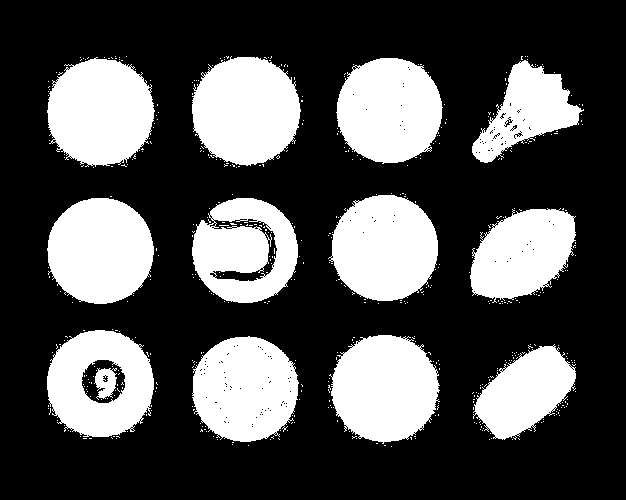

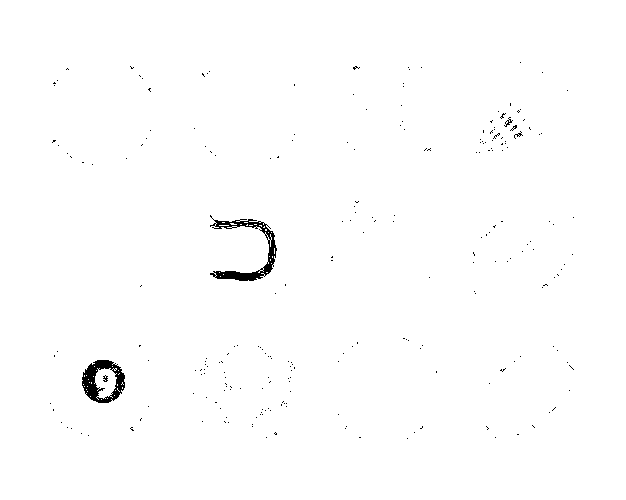

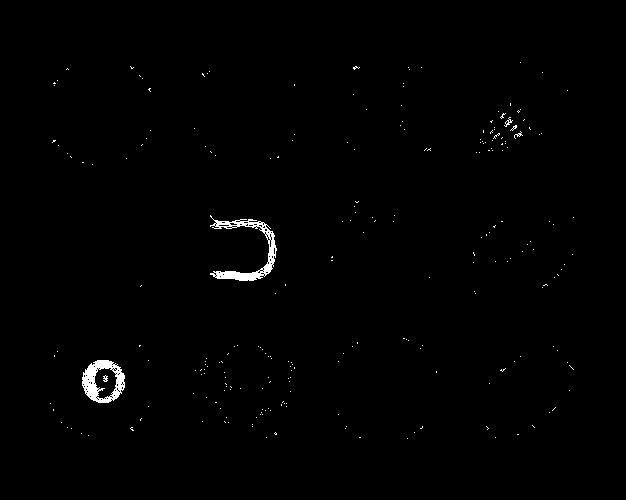

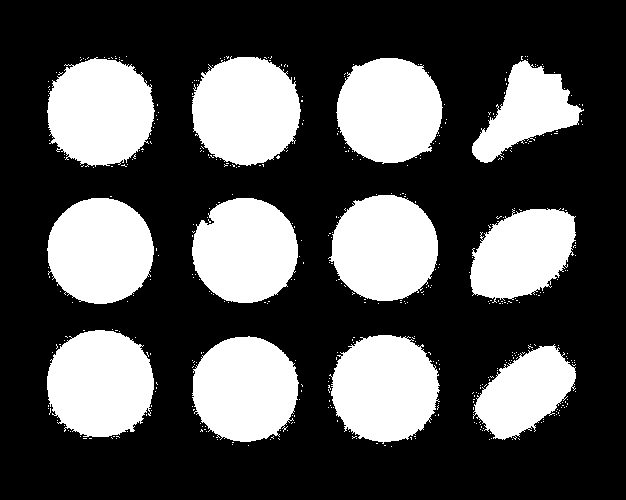

-1

In [373]:
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
 
# Read image
img1 = cv2.imread("imagem1.jpg")

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(gray, 251, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
cv2_imshow( im_th)
cv2_imshow( im_floodfill)
cv2_imshow(im_floodfill_inv)
cv2_imshow(im_out)
cv2.waitKey(0)

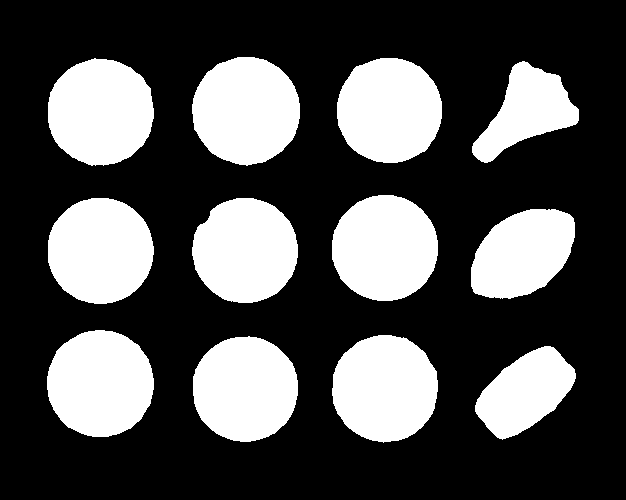

In [374]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mascara1 = cv2.morphologyEx(im_out, cv2.MORPH_OPEN, kernel1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
mascara2 = cv2.dilate(mascara1,kernel2,iterations=1)


kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
mascara3 = cv2.erode(mascara2,kernel2,iterations=1)

cv2_imshow(mascara3)


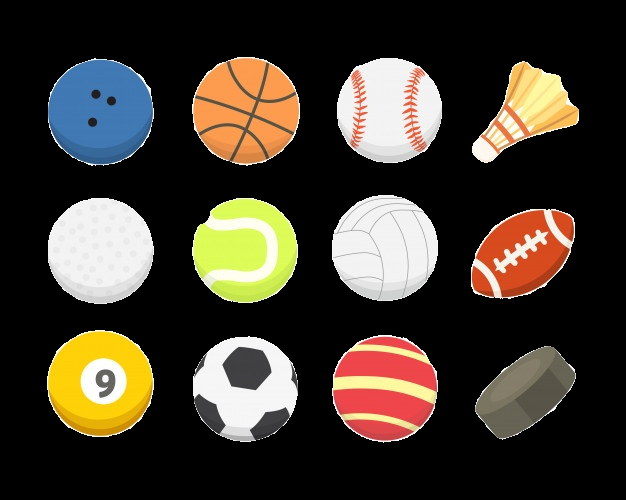

In [375]:
fun_pre = cv2.bitwise_and(img1,img1,mask=mascara3)
cv2_imshow(fun_pre)

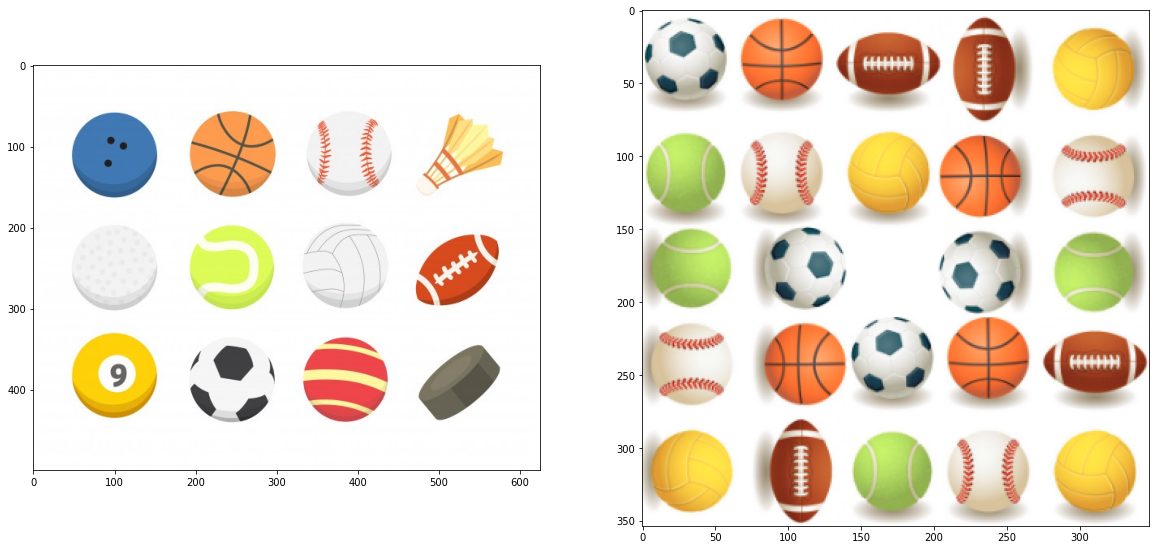

In [376]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 
from skimage.filters import (threshold_otsu, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte

img1 = cv2.imread('imagem1.jpg')
img2 = cv2.imread('imagem2.png')
imagem_BGR1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
imagem_BGR2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


fig,ax = plt.subplots(1,2, figsize=(20,12))

ax[0].imshow(imagem_BGR1)
ax[1].imshow(imagem_BGR2)
plt.show()

## Imagem 1

### bola de boliche

In [377]:
hsv_azul = np.uint8([[[251,251,251]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0   0 251]]]


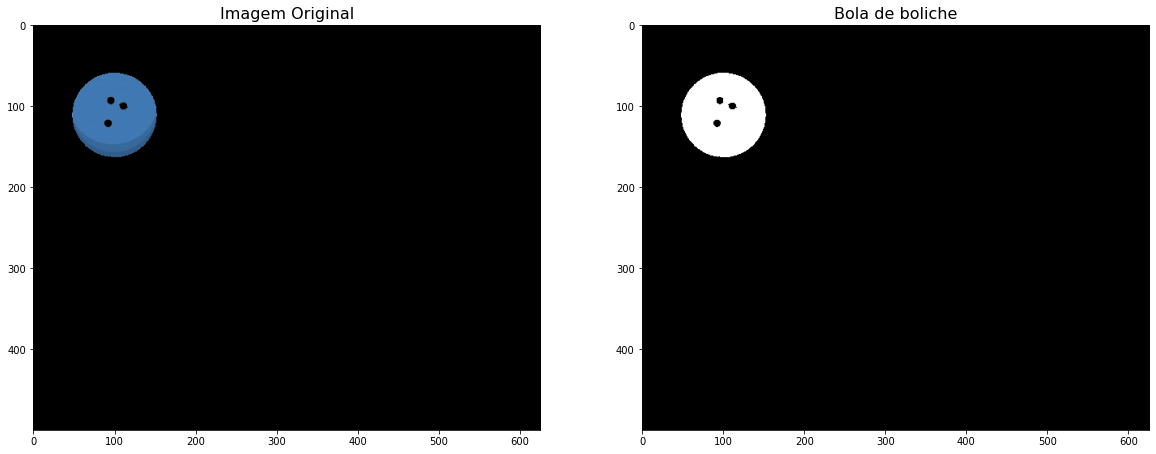

In [378]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper_azul_cla= np.array([107,255,255])
lower_azul_cla= np.array([90,100,100])

mask6= cv2.inRange(hsv, lower_azul_cla, upper_azul_cla)
masc_azul_cla = cv2.bitwise_and(img1,img1,mask=mask6)
bola_boliche = cv2.cvtColor(masc_azul_cla, cv2.COLOR_BGR2RGB)

thresh_triangle = threshold_triangle(bola_boliche)
binary_triangle = bola_boliche > thresh_triangle
binary_triangle = img_as_ubyte(binary_triangle)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(bola_boliche)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(binary_triangle)
plt.show()



[]

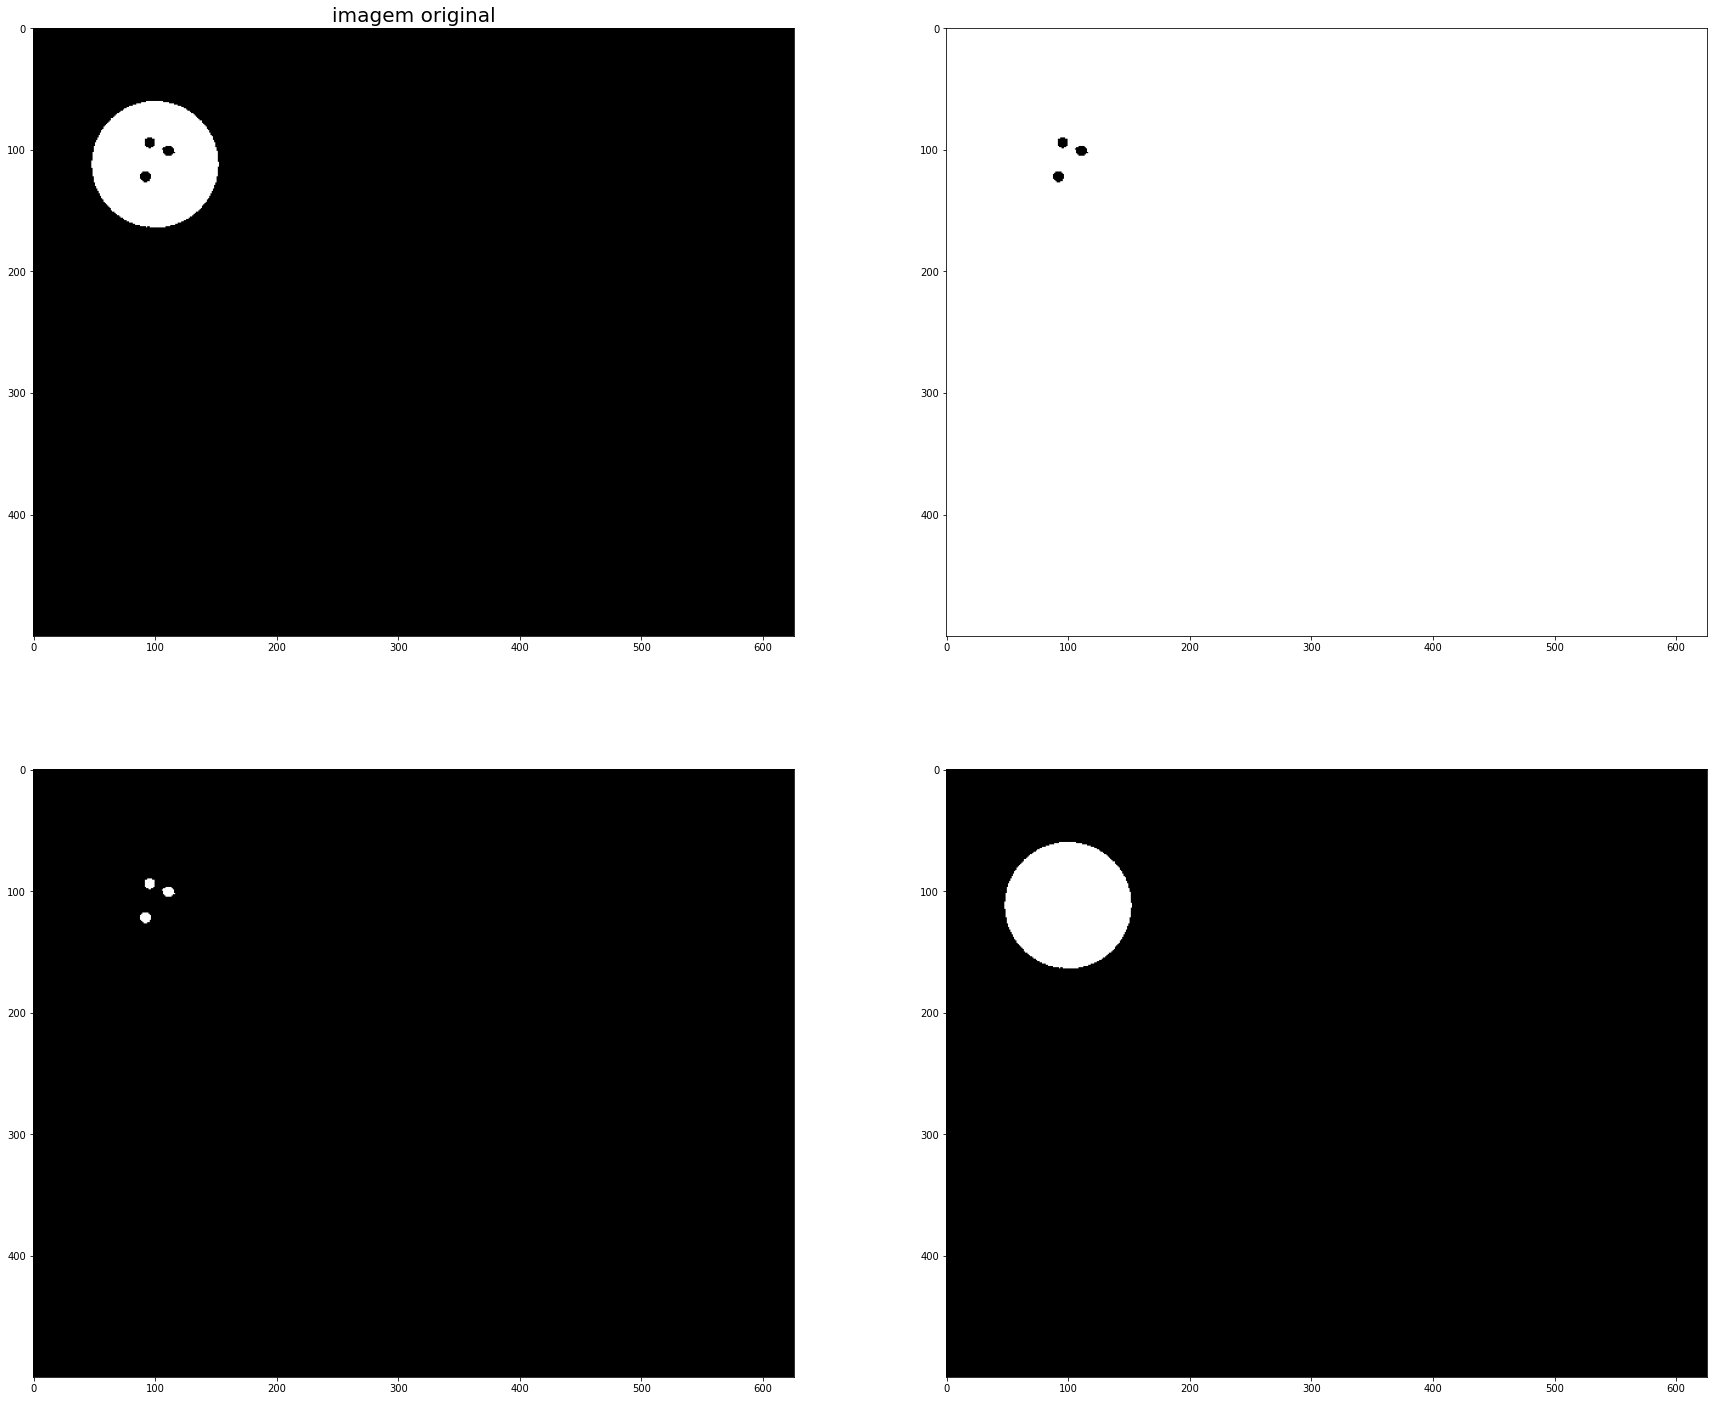

In [379]:
gray_image1 = cv2.cvtColor(bola_boliche, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.
# cv2.imshow("Thresholded Image", im_th)
# cv2.imshow("Floodfilled Image", im_floodfill)
# cv2.imshow("Inverted Floodfilled Image", im_floodfill_inv)
# cv2.imshow("Foreground", im_out)
# cv2.waitKey(0)

src2 = cv2.resize(im_out, img1.shape[1::-1])

fig,ax = plt.subplots(2,2,figsize=(30,25))

ax[0,0].set_title('imagem original', fontsize=20)
ax[0,0].imshow(im_th,'gray')
ax[0,1].imshow(im_floodfill,'gray')
ax[1,0].imshow(im_floodfill_inv ,'gray')
ax[1,1].imshow(src2,'gray')
plt.plot()


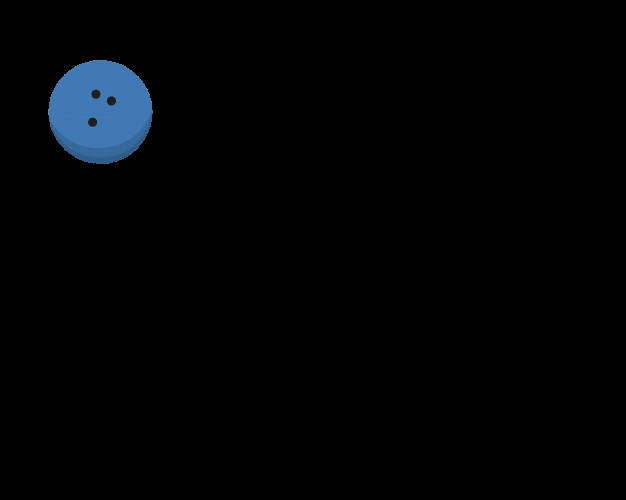

In [435]:
bola_boliche = cv2.bitwise_and(fun_pre,fun_pre,mask=src2)
cv2_imshow(bola_boliche)

### bola de sinuca

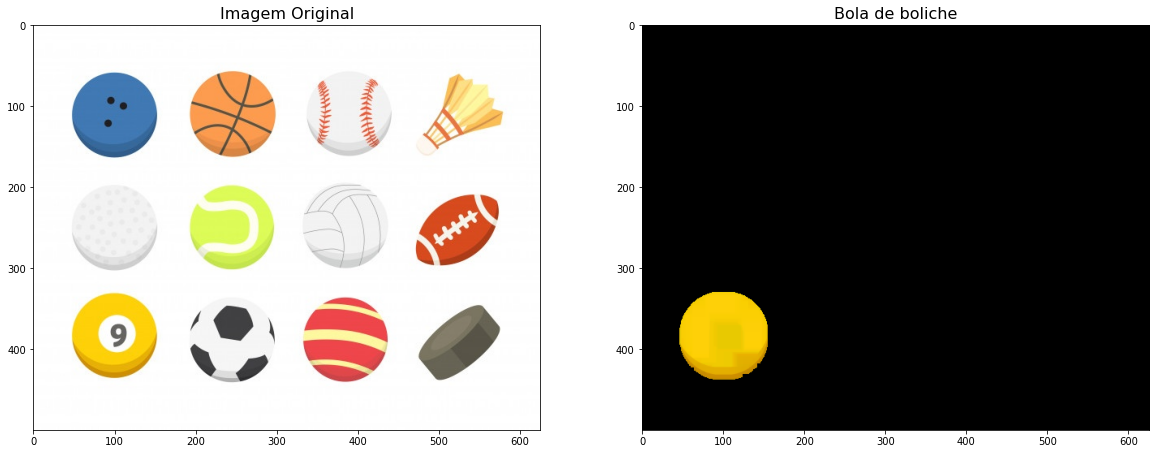

In [381]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper_azul_cla= np.array([30, 255 ,255])
lower_azul_cla= np.array([20,100,100])

mask6= cv2.inRange(hsv, lower_azul_cla, upper_azul_cla)
masc_azul_cla = cv2.bitwise_and(img1,img1,mask=mask6)
bola_boliche = cv2.cvtColor(masc_azul_cla, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
erosao1 = cv2.erode(bola_boliche,kernel1,iterations = 1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(47,47))
dilation1 = cv2.dilate(erosao1,kernel2,iterations = 1)

kernel3= cv2.getStructuringElement(cv2.MORPH_RECT,(28,28))
erosao2 = cv2.erode(dilation1,kernel3,iterations = 1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(erosao2)
plt.show()

[]

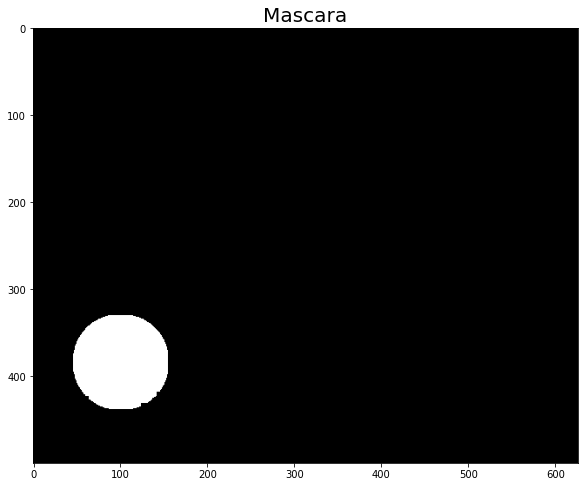

In [382]:
gray_image1 = cv2.cvtColor(erosao2, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(im_th,'gray')
plt.plot()


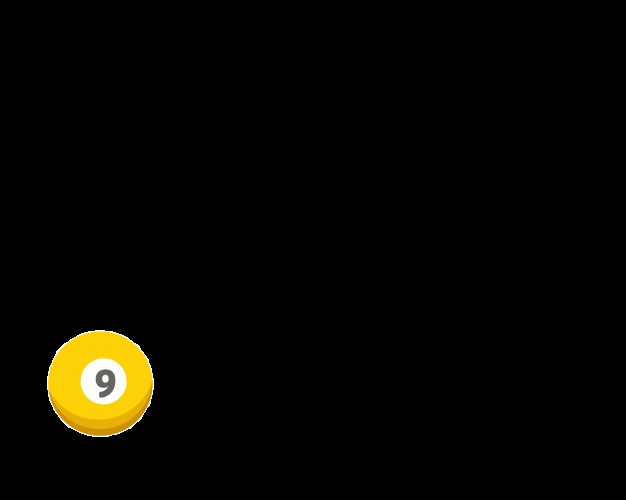

In [383]:
bola_sinuca = cv2.bitwise_and(fun_pre,fun_pre,mask=im_th)
cv2_imshow(bola_sinuca)

### bola de basquete

In [384]:
hsv_azul = np.uint8([[[79,156,252]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 13 175 252]]]


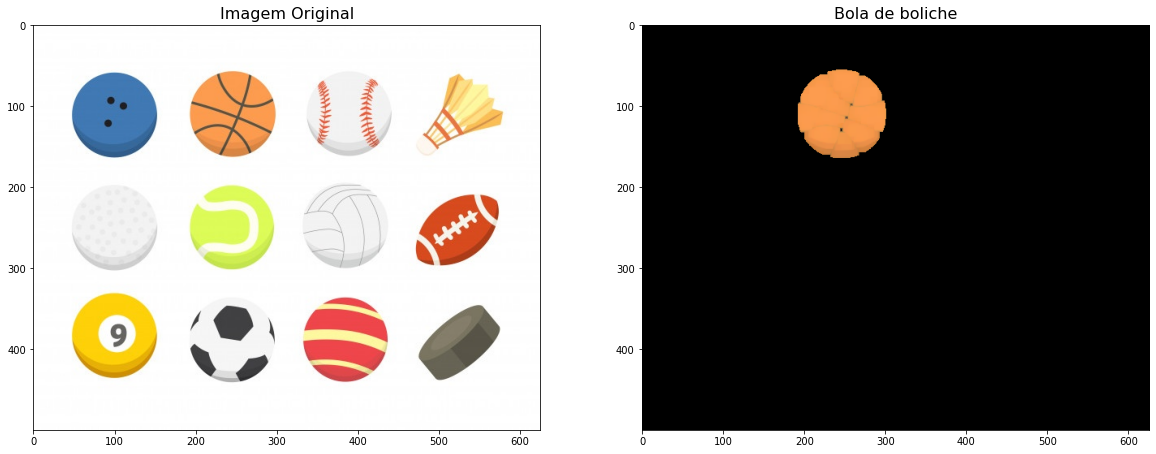

In [385]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([16,255,255])
lower = np.array([12,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
erosao1 = cv2.erode(bola,kernel1,iterations = 1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
dilation1 = cv2.dilate(erosao1,kernel2,iterations = 1)



fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(dilation1)
plt.show()


[]

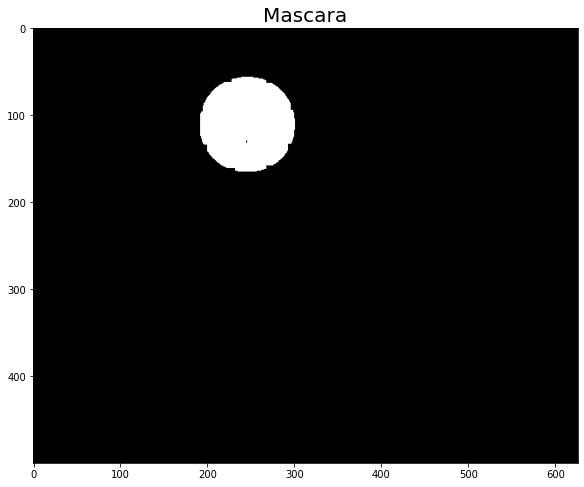

In [386]:
gray_image1 = cv2.cvtColor(dilation1, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(im_th,'gray')
plt.plot()


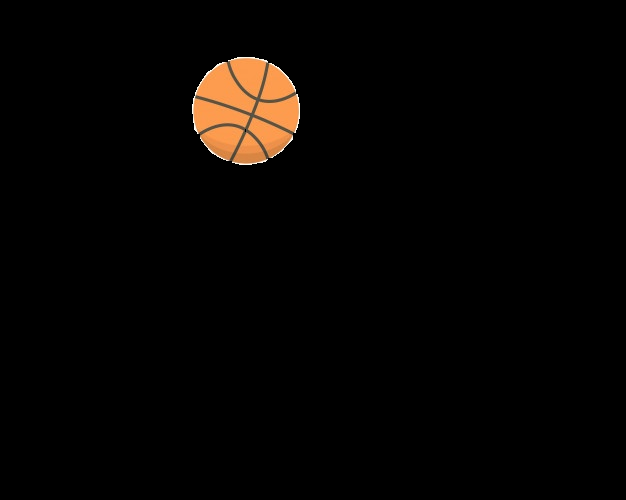

In [387]:
bola_basquete = cv2.bitwise_and(fun_pre,fun_pre,mask=im_th)
cv2_imshow(bola_basquete)

### Bola de futebol americano

In [388]:
hsv_azul = np.uint8([[[232,244,244]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 30  13 244]]]


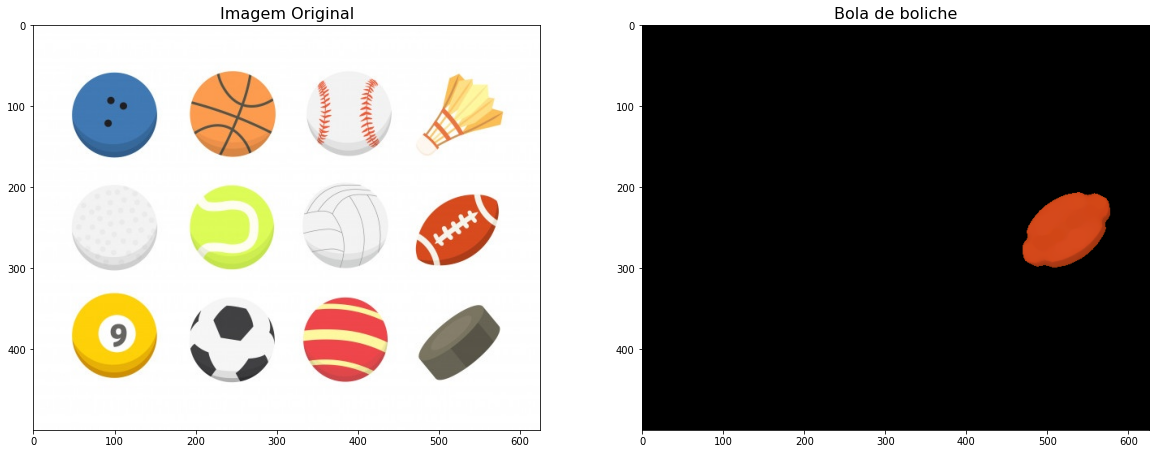

In [389]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([9,255,255])
lower = np.array([2,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
erosao = cv2.erode(bola,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(29,29))
erosao = cv2.dilate(erosao,kernel2,iterations=1)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
erosao = cv2.erode(erosao,kernel1,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(erosao)
plt.show()

[]

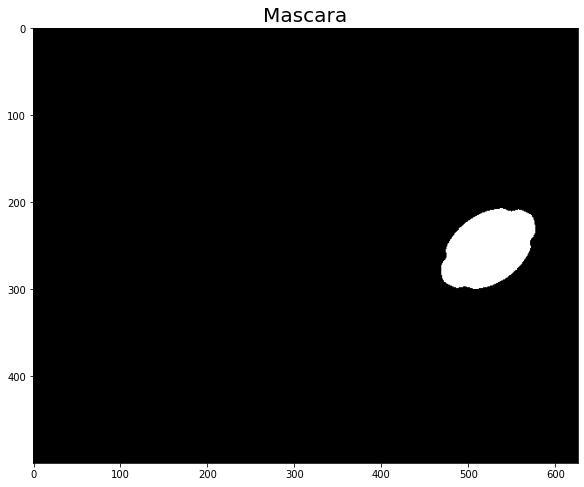

In [390]:
gray_image1 = cv2.cvtColor(erosao, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(im_th,'gray')
plt.plot()


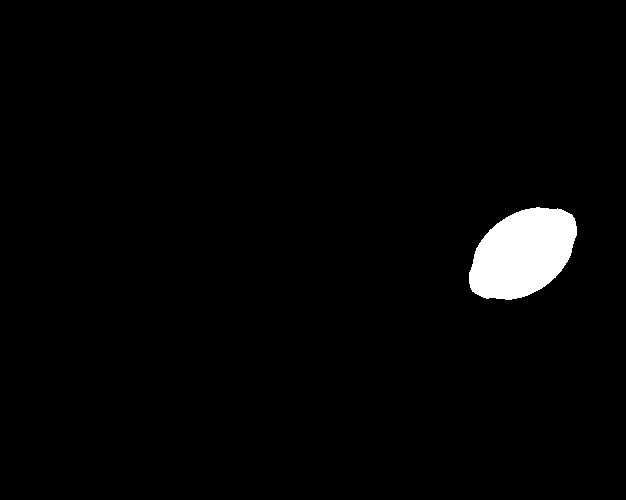

In [391]:
# Trying triangle scikit-image algorithm:
thresh_triangle = threshold_triangle(gray_image1)
binary_triangle = gray_image1 > thresh_triangle
binary_triangle = img_as_ubyte(binary_triangle)
tri =cv2.bitwise_and(binary_triangle,binary_triangle,mask=im_th)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(91,91))
fechamento1 = cv2.morphologyEx(tri, cv2.MORPH_CLOSE, kernel1)
cv2_imshow(fechamento1)


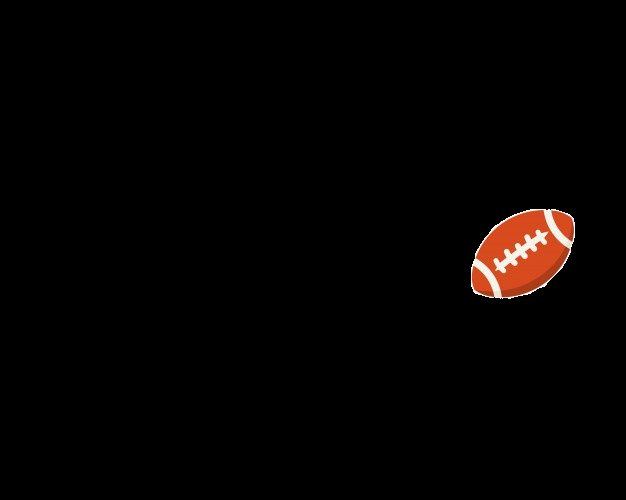

In [392]:
bola_famericano = cv2.bitwise_and(fun_pre,fun_pre,mask=fechamento1)
cv2_imshow(bola_famericano)

### bola de gude

In [393]:
hsv_azul = np.uint8([[[72,70,224]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0 175 224]]]


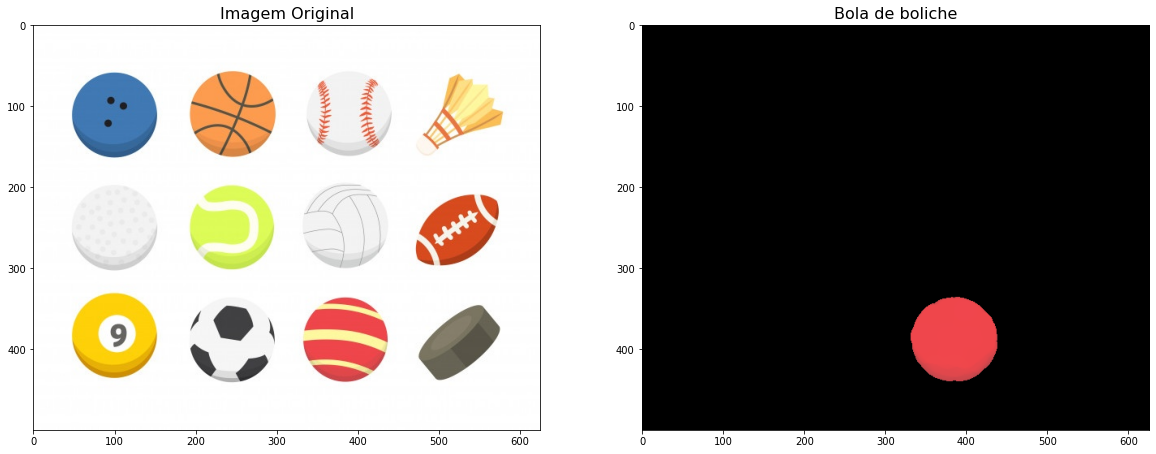

In [394]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([179,255,255])
lower = np.array([161,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola1 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

upper = np.array([29,255,255])
lower = np.array([27,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola2 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

imagem23 = (bola1 + bola2)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
erode23 = cv2.dilate(imagem23,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(33,33))
erodefi = cv2.erode(erode23,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(27,27))
dilataf = cv2.dilate(erodefi,kernel3,iterations=1)
 

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(dilataf)
plt.show()

[]

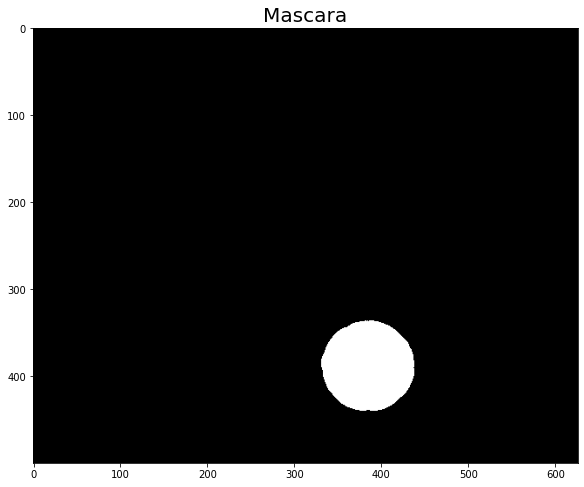

In [395]:
gray_image1 = cv2.cvtColor(dilataf, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(im_th,'gray')
plt.plot()


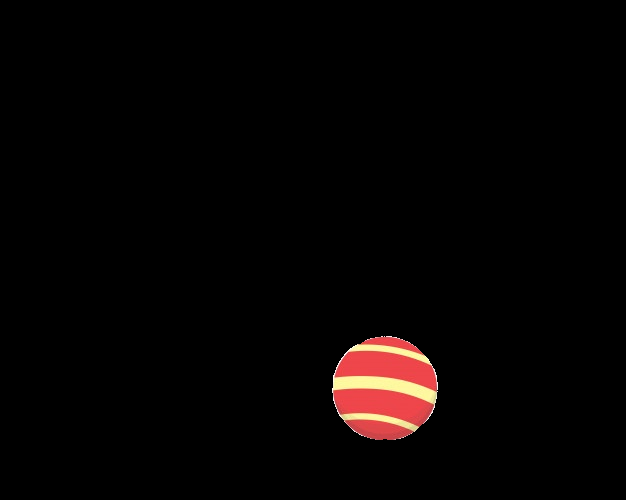

In [396]:
bola_gude = cv2.bitwise_and(fun_pre,fun_pre,mask=im_th)
cv2_imshow(bola_gude)

### bola de têniz

In [397]:
hsv_azul = np.uint8([[[85,252,219]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 36 169 252]]]


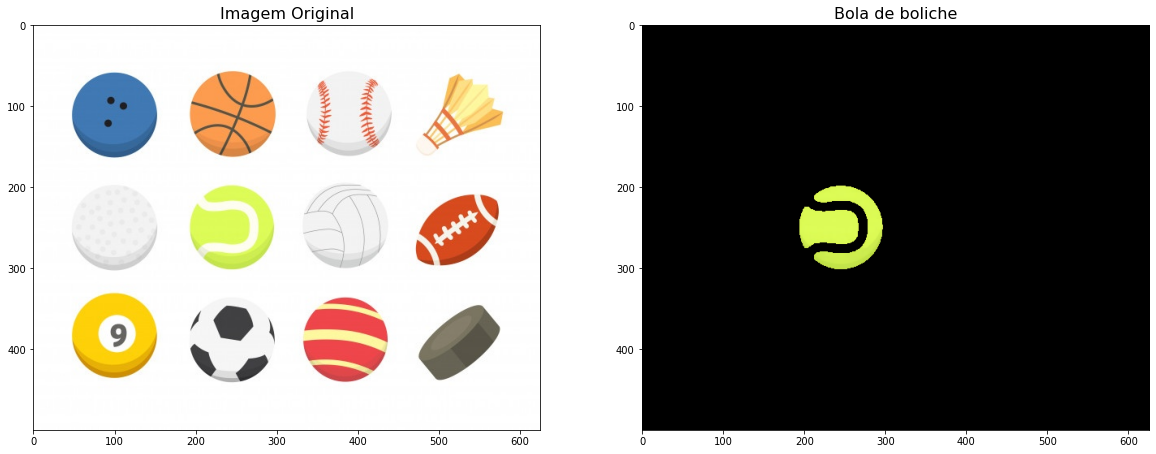

In [398]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([46,255,255])
lower = np.array([30,100,100])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
abertura1 = cv2.morphologyEx(bola, cv2.MORPH_OPEN, kernel1)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(abertura1)
plt.show()

[]

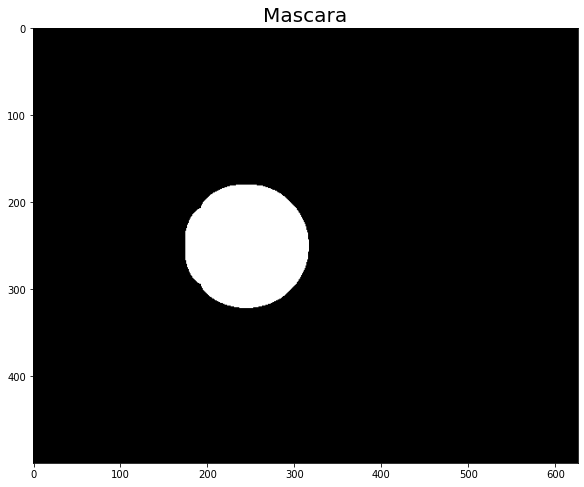

In [399]:
gray_image1 = cv2.cvtColor(abertura1, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
dilatafi = cv2.dilate(im_th,kernel3,iterations=1)

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(dilatafi,'gray')
plt.plot()


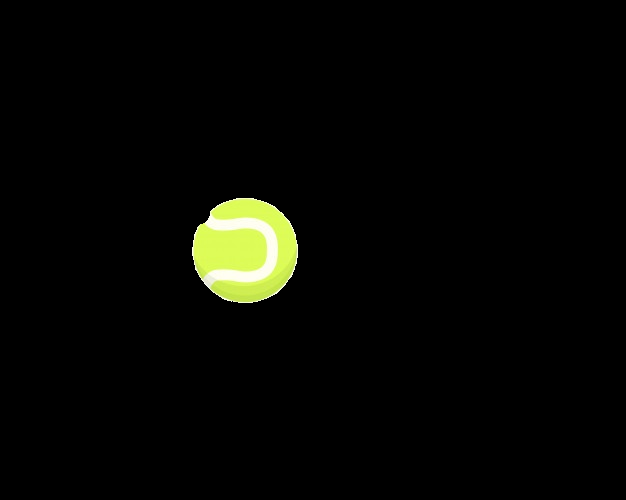

In [400]:
bola_tenis = cv2.bitwise_and(fun_pre,fun_pre,mask=dilatafi)
cv2_imshow(bola_tenis)

### bola de golf

In [401]:
hsv_azul = np.uint8([[[242,242,242]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0   0 242]]]


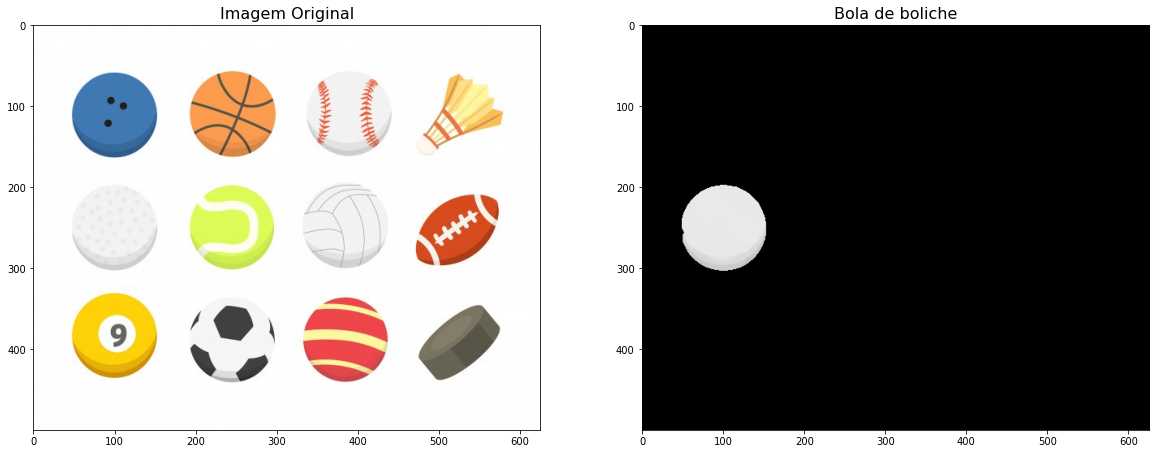

In [402]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([0,0,246])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,35))
abertura1 = cv2.morphologyEx(bola, cv2.MORPH_OPEN, kernel1)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(abertura1)
plt.show()

[]

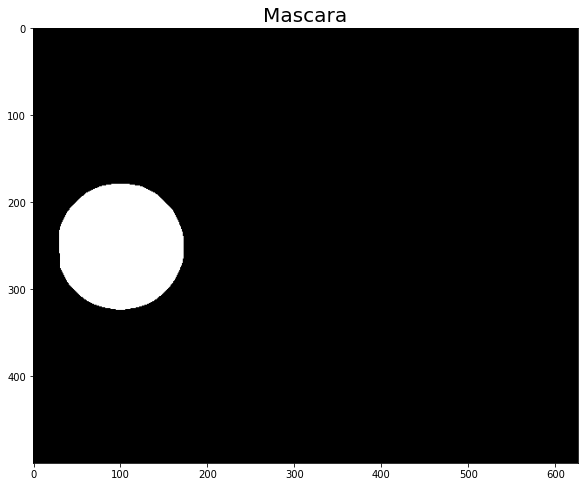

In [403]:
gray_image1 = cv2.cvtColor(abertura1, cv2.COLOR_BGR2GRAY)

th, im_th = cv2.threshold(gray_image1, 0, 255, cv2.THRESH_BINARY);

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
dilatafi = cv2.dilate(im_th,kernel3,iterations=1)

fig,ax = plt.subplots(figsize=(17,8))

ax.set_title('Mascara', fontsize=20)
plt.imshow(dilatafi,'gray')
plt.plot()


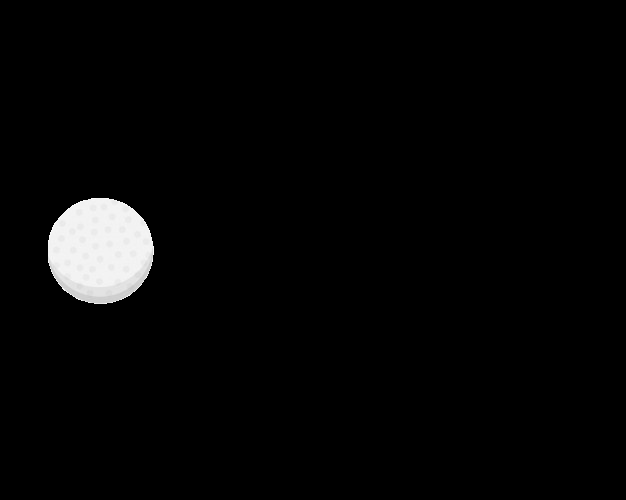

In [404]:
bola_golfe = cv2.bitwise_and(fun_pre,fun_pre,mask=dilatafi)
cv2_imshow(bola_golfe)

### Bola de volei

In [405]:
hsv_azul = np.uint8([[[242,242,242]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[  0   0 242]]]


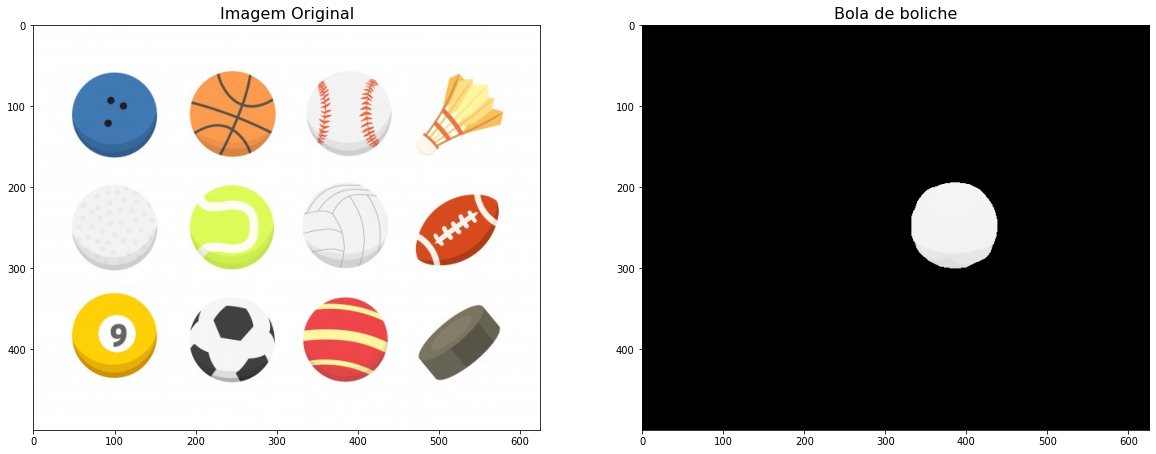

In [406]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([0,0,250])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

imagem = bola - bola_golfe

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
abertura1 = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(45,45))
erode = cv2.erode(abertura1,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(45,45))
dilata = cv2.dilate(erode,kernel3,iterations=1)


fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(dilata)
plt.show()

[]

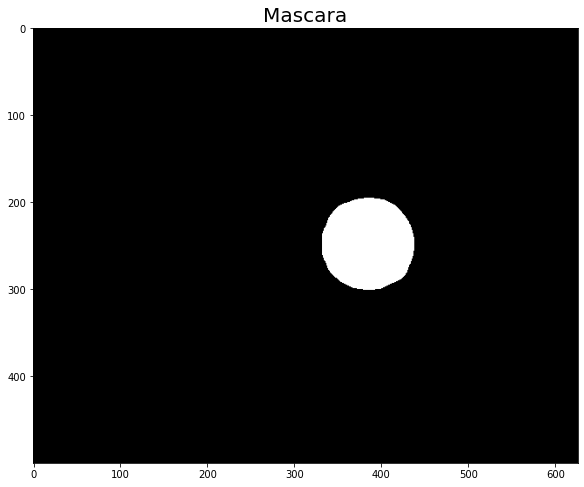

In [407]:
gray_image = cv2.cvtColor(dilata,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

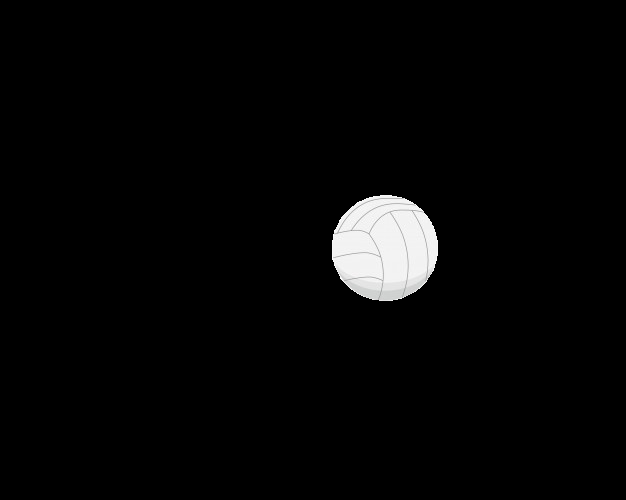

In [408]:
bola_volei = cv2.bitwise_and(fun_pre,fun_pre,mask=saida)
cv2_imshow(bola_volei)

### Bola de futebol

In [409]:
hsv_azul = np.uint8([[[218,115,91]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[114 149 218]]]


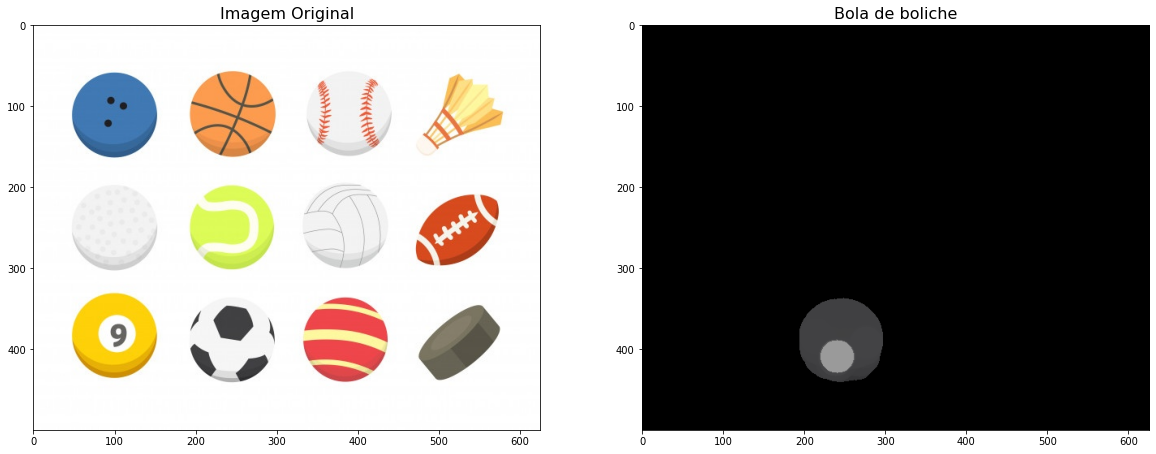

In [418]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

up = np.array([0,5,251])
low = np.array([0,0,0])

mask6= cv2.inRange(hsv, low, up)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola_futebol1 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

up = np.array([179,255,255])
low = np.array([110,0,0])

mask6= cv2.inRange(hsv, low, up)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
bola_futebol2 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

futi = (bola_futebol1 + bola_futebol2) - (bola_golfe + bola_volei)


kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilata_futi = cv2.dilate(futi,kernel1,iterations=1)


kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(47,47))
erode_futi = cv2.erode(dilata_futi,kernel2,iterations=1)


kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(41,41))
dilata_futi1 = cv2.dilate(erode_futi,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(dilata_futi1)
plt.show()

[]

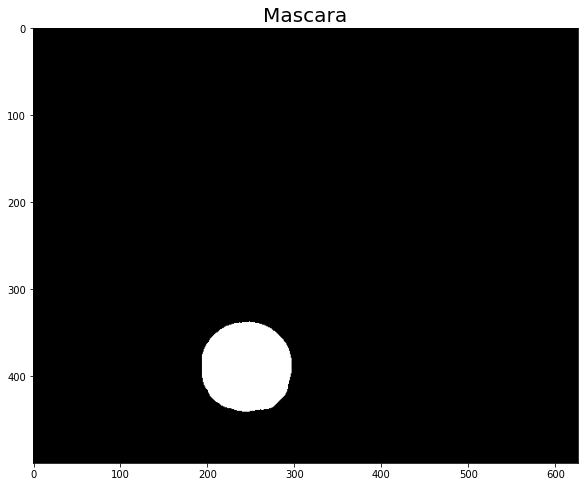

In [419]:
gray_image = cv2.cvtColor(dilata_futi1,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

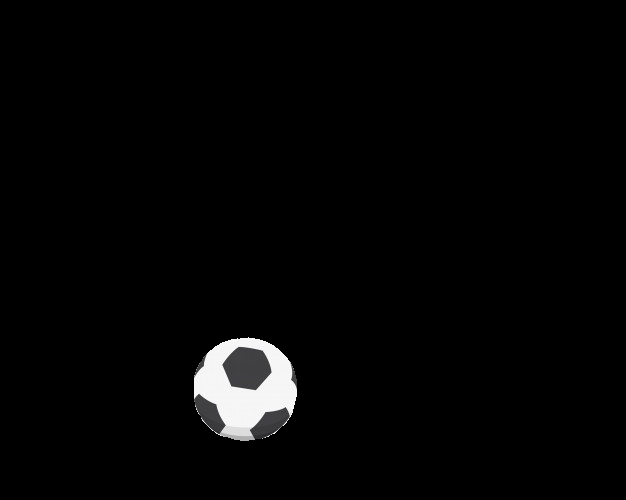

In [420]:
bola_futebol = cv2.bitwise_and(fun_pre,fun_pre,mask=saida) 
cv2_imshow(bola_futebol)

### Disco de hóquei

In [413]:
hsv_azul = np.uint8([[[133,126,107]]]) #cores em BGR
hsv_azul = cv2.cvtColor(hsv_azul,cv2.COLOR_BGR2HSV)
print(hsv_azul)

[[[ 98  50 133]]]


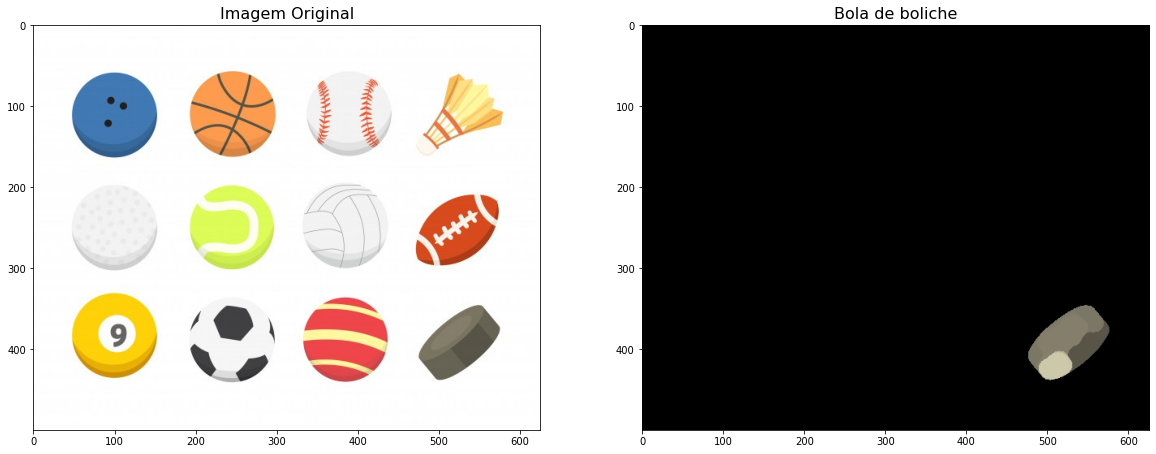

In [428]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

upper = np.array([95,45,103])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
disco_hoquei1 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

upper = np.array([98,50,133])
lower = np.array([0,0,0])

mask6= cv2.inRange(hsv, lower, upper)
masc_b = cv2.bitwise_and(img1,img1,mask=mask6)
disco_hoquei2 = cv2.cvtColor(masc_b, cv2.COLOR_BGR2RGB)

disco = disco_hoquei1 + disco_hoquei2

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17))
disco1 = cv2.dilate(disco,kernel1,iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(37,37))
disco2 = cv2.erode(disco1,kernel2,iterations=1)

kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23))
disco3 = cv2.dilate(disco2,kernel3,iterations=1)

fig, ax = plt.subplots(1,2 , figsize=(20,12)) 

ax[0].set_title('Imagem Original', fontsize=16)
ax[0].imshow(imagem_BGR1)
ax[1].set_title('Bola de boliche', fontsize=16)
ax[1].imshow(disco3)
plt.show()

[]

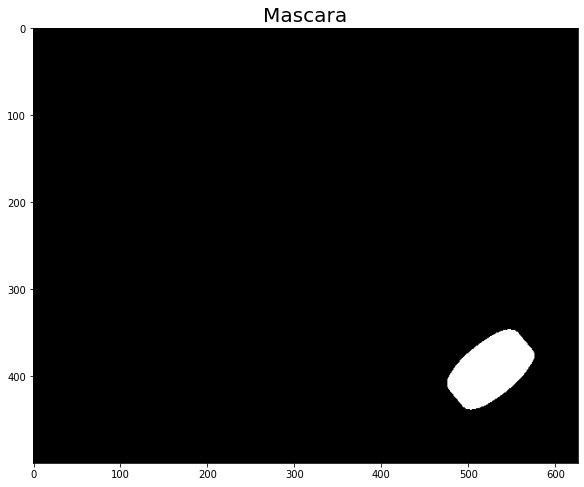

In [429]:
gray_image = cv2.cvtColor(disco3,cv2.COLOR_BGR2GRAY)

T,saida = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY)

fig,ax=plt.subplots(figsize=(17,8))

ax.set_title('Mascara',fontsize=20)
plt.imshow(saida,'gray')
plt.plot()

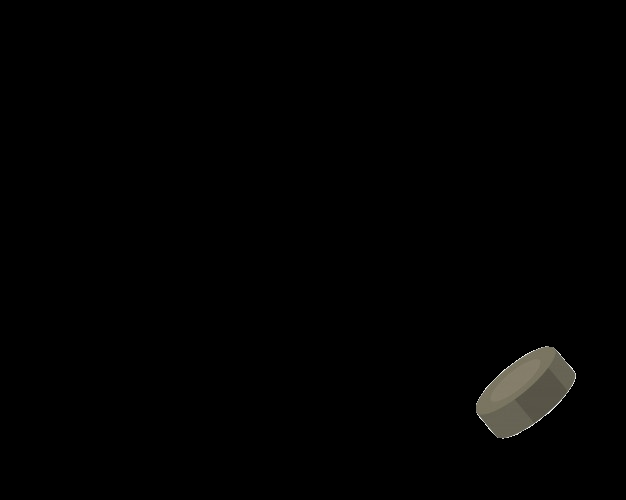

In [430]:
disco_hoquei = cv2.bitwise_and(fun_pre,fun_pre,mask=saida) 
cv2_imshow(disco_hoquei)

### Bola de beisebol

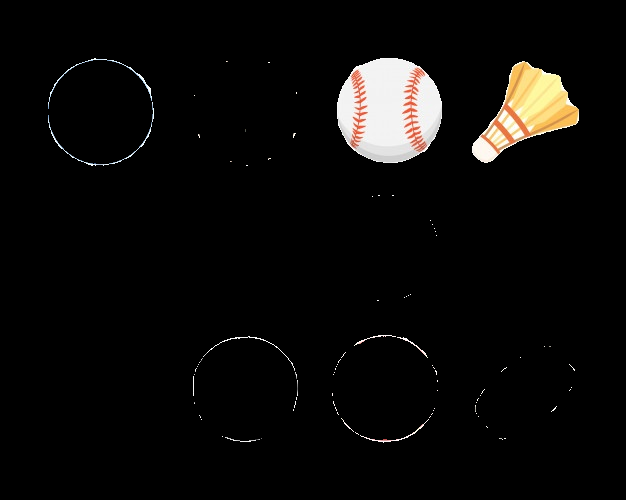

In [436]:
imagem_in = fun_pre - (bola_volei + bola_basquete + bola_famericano + bola_golfe + bola_gude + disco_hoquei + bola_sinuca + bola_tenis + bola_futebol + bola_boliche)
cv2_imshow(imagem_in)

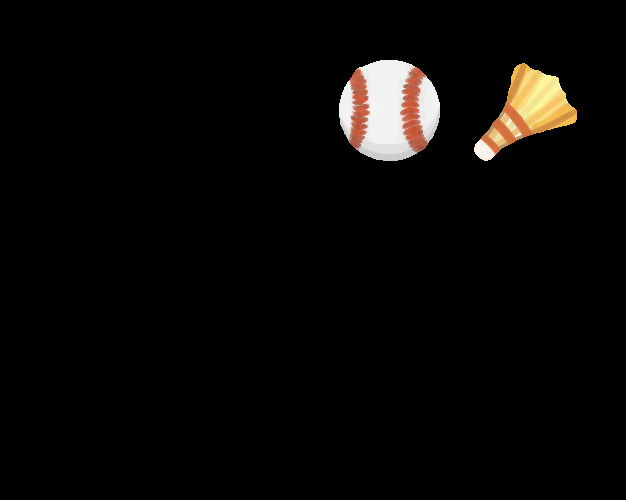

In [439]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
beisebol = cv2.erode(imagem_in,kernel2,iterations=1)
cv2_imshow(beisebol)

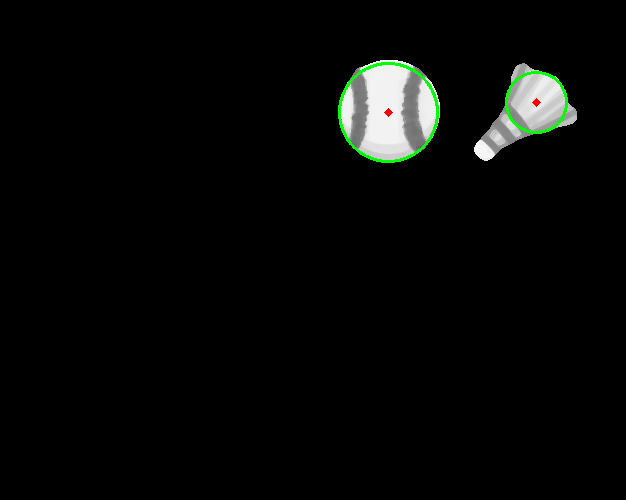

In [475]:
gray = cv2.cvtColor(beisebol, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,param1=100,param2=30,minRadius=10,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)